In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Harga beli saham tertinggi dalam IDR: 673395.6537


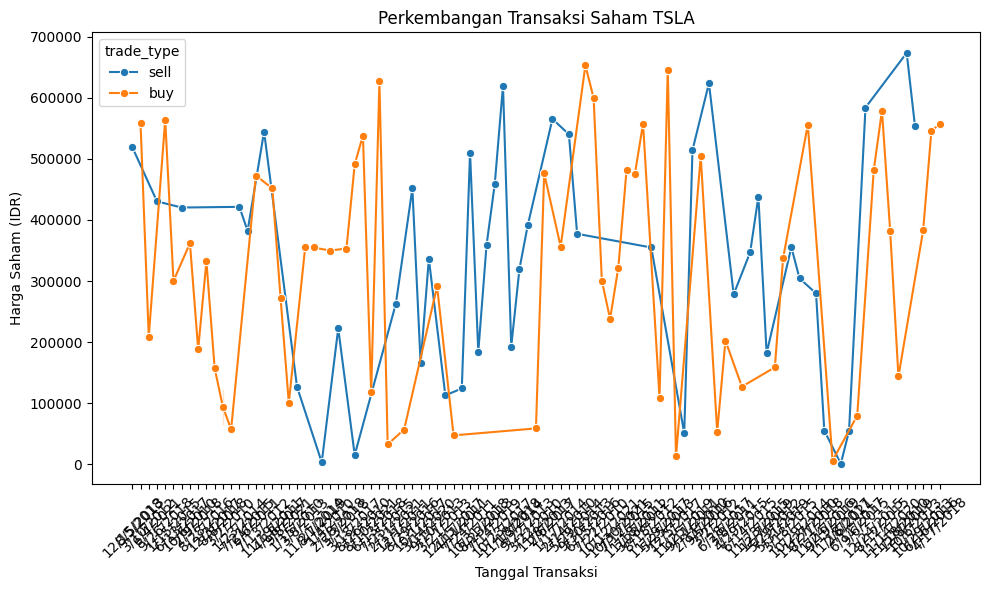

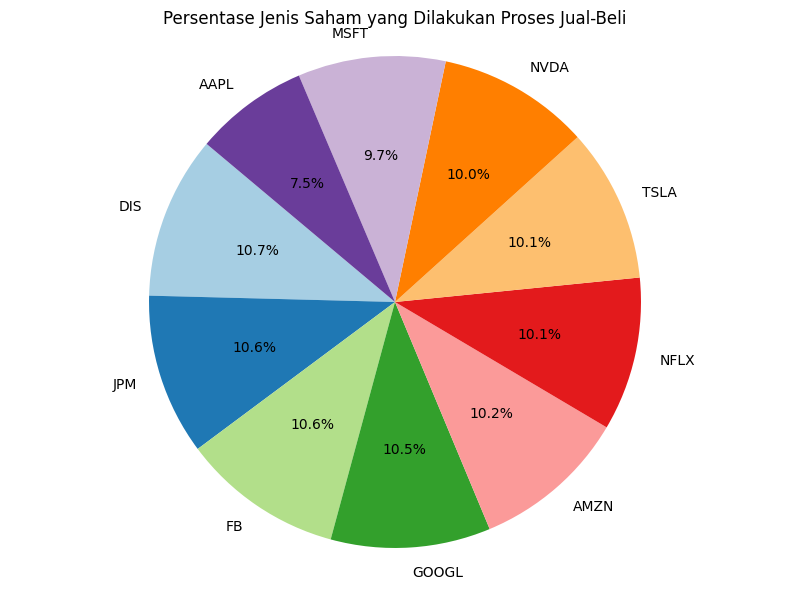

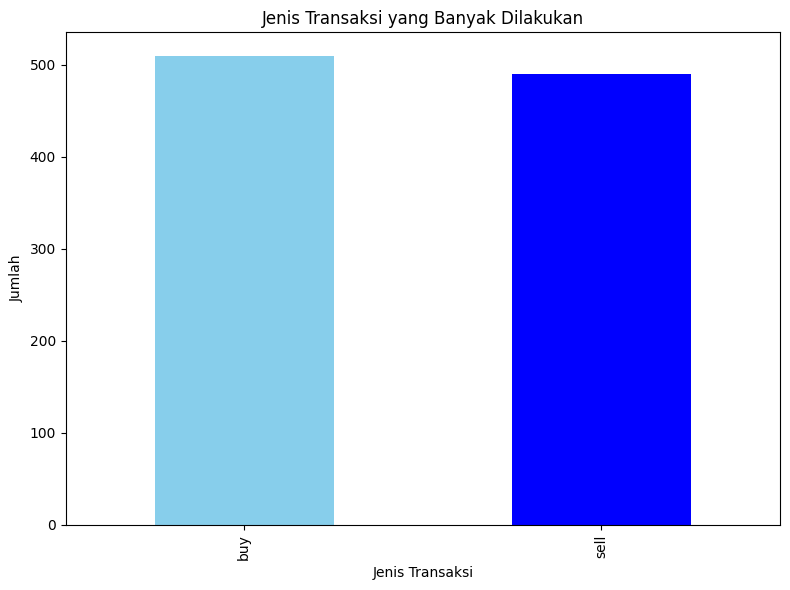

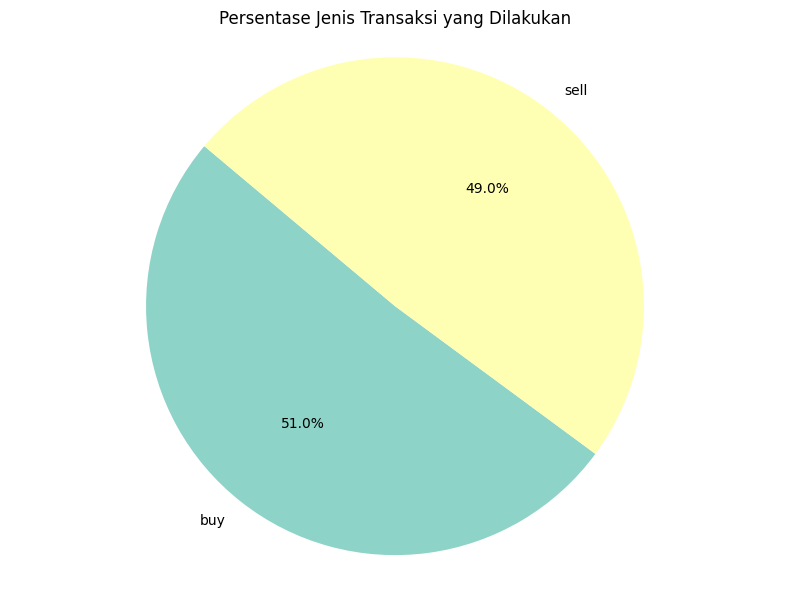

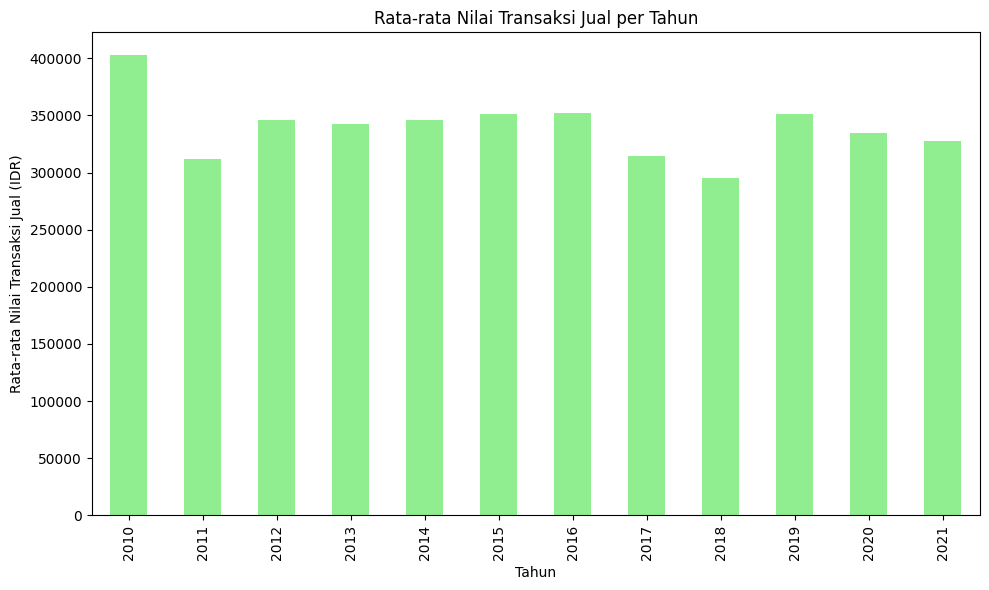

In [38]:
df = pd.read_json('https://gist.githubusercontent.com/nadirbslmh/93b62fdcfa694d4ec07bed9b3c94e401/raw/c07971341361e23fd4f3a880437c4d8e4ebcfafc/stock_trades.json')

#konversi ke rupiah
df['trade_price'] = df['trade_price'].apply(lambda x: x * 675.51)

#harga beli saham tertinggi
max_buy_price = df[df['trade_type'] == 'buy']['trade_price'].max()
print(f'Harga beli saham tertinggi dalam IDR: {max_buy_price}')

#filter data untuk saham TSLA
tsla_df = df[df['stock_symbol'] == 'TSLA']
#plot perkembangan transaksi
plt.figure(figsize=(10, 6))
sns.lineplot(data=tsla_df, x='trade_date', y='trade_price', hue='trade_type', marker='o')
plt.title('Perkembangan Transaksi Saham TSLA')
plt.xlabel('Tanggal Transaksi')
plt.ylabel('Harga Saham (IDR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#persentase jenis saham
stock_counts = df['stock_symbol'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 6))
plt.pie(stock_counts, labels=stock_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Persentase Jenis Saham yang Dilakukan Proses Jual-Beli')
plt.axis('equal')
plt.tight_layout()
plt.show()

#jenis transaksi yang banyak dilakukan (buy/sell)
transaction_counts = df['trade_type'].value_counts()
plt.figure(figsize=(8, 6))
transaction_counts.plot(kind='bar', color=['skyblue', 'blue'])
plt.title('Jenis Transaksi yang Banyak Dilakukan')
plt.xlabel('Jenis Transaksi')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

#persentase jenis transaksi
transaction_percents = df['trade_type'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 6))
plt.pie(transaction_percents, labels=transaction_percents.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Persentase Jenis Transaksi yang Dilakukan')
plt.axis('equal')
plt.tight_layout()
plt.show()

#ubah tipe data kolom trade_date menjadi datetime
df['trade_date'] = pd.to_datetime(df['trade_date'], format='%m/%d/%Y')

#mengelompokkan data berdasarkan tahun dan menghitung rata-rata nilai transaksi jual
avg_sell_price_per_year = df[df['trade_type'] == 'sell'].groupby(df['trade_date'].dt.year)['trade_price'].mean()

plt.figure(figsize=(10, 6))
avg_sell_price_per_year.plot(kind='bar', color='lightgreen')
plt.title('Rata-rata Nilai Transaksi Jual per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Nilai Transaksi Jual (IDR)')
plt.tight_layout()
plt.show()